<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW_4_Q2_2_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
m = len(housing)
m

545

In [11]:
housing.shape

(545, 13)

In [12]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0, 'unfurnished': 0, 'semi-furnished': 0.5, 'furnished': 1})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,1.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,1.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,0.5
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,1.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,1.0


In [13]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
data = housing[num_vars]

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define standard scaler
scaler = StandardScaler()
#scaler = MinMaxScaler()
data[num_vars] = scaler.fit_transform(data[num_vars])
data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,4.566365
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,4.004484
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,4.004484
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,3.985755
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,3.554979


In [14]:
Y = data.pop('price')
X = data

In [15]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035


In [16]:
Y.head()

0    4.566365
1    4.004484
2    4.004484
3    3.985755
4    3.554979
Name: price, dtype: float64

In [17]:
#importing Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principalComponents = pd.DataFrame(principalComponents)
principalComponents

,0,1,2,3,4,5
0,3.264248,-1.129485,-0.970129,-0.379770,0.088708,1.163415
1,5.194952,-3.347516,-0.606242,0.848273,-1.755151,0.339655
2,2.460935,1.278579,-0.774908,0.943963,-0.219911,1.936179
3,3.625400,0.538743,-0.499336,0.437404,-1.111885,1.573934
4,2.502535,1.070341,0.591199,-0.072931,-1.381342,-1.308014
...,...,...,...,...,...,...
540,-1.078671,1.444086,-0.460261,0.731117,-0.962579,-0.099747
541,-2.533313,-0.848245,1.179400,-0.166552,-0.896304,0.818386
542,-2.063004,0.305558,-0.688171,-0.236624,0.352581,-0.385214
543,-2.441185,-0.810540,1.092558,-0.143493,-0.934570,0.837194


In [18]:
#Setting the principal components as the input variables
X = principalComponents.iloc[:, [0, 1, 2, 3,4,5]].values
Y = housing.iloc[:, 10].values

In [19]:
X

array([[ 3.26424768, -1.12948536, -0.97012869, -0.37977007,  0.08870821,
         1.16341476],
       [ 5.19495231, -3.34751638, -0.60624246,  0.84827257, -1.75515134,
         0.33965489],
       [ 2.4609346 ,  1.27857941, -0.77490782,  0.94396343, -0.21991114,
         1.93617945],
       ...,
       [-2.0630044 ,  0.30555825, -0.68817127, -0.23662428,  0.3525809 ,
        -0.38521379],
       [-2.44118483, -0.8105399 ,  1.09255793, -0.14349258, -0.93456985,
         0.83719437],
       [-1.1401034 , -0.68809002, -0.26605215, -0.31992447,  0.75714687,
        -0.10708526]])

In [20]:
Y

array([2, 3, 2, 3, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 1, 3, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 0, 3, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0,
       0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 1, 2, 3, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 3, 0,

In [21]:
#importing train_test_split
#splitting the dataset into 80% and 20% split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [22]:
# Linear Support vector regression

from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr_lin = SVR(kernel='linear', C=1e3)
svr_lin.fit(X_train, Y_train) # Fit the SVR model according to the given training data.
print('Accuracy of SVR on training set: {:.5f}'.format(svr_lin.score(X_train, Y_train)))
print('Accuracy of SVR on test set: {:.5f}'.format(svr_lin.score(X_test, Y_test)))

Accuracy of SVR on training set: 0.75517
Accuracy of SVR on test set: 0.75285


In [23]:
#importing Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalComponents = pd.DataFrame(principalComponents)
principalComponents

,0,1,2,3,4
0,3.264248,-1.129485,-0.970129,-0.379770,0.088708
1,5.194952,-3.347516,-0.606242,0.848273,-1.755151
2,2.460935,1.278579,-0.774908,0.943963,-0.219911
3,3.625400,0.538743,-0.499336,0.437404,-1.111885
4,2.502535,1.070341,0.591199,-0.072931,-1.381342
...,...,...,...,...,...
540,-1.078671,1.444086,-0.460261,0.731117,-0.962579
541,-2.533313,-0.848245,1.179400,-0.166552,-0.896304
542,-2.063004,0.305558,-0.688171,-0.236624,0.352581
543,-2.441185,-0.810540,1.092558,-0.143493,-0.934570


In [24]:
#Setting the principal components as the input variables
X = principalComponents.iloc[:, [0, 1, 2, 3, 4]].values
Y = housing.iloc[:, 10].values

In [25]:
X

array([[ 3.26424768, -1.12948536, -0.97012869, -0.37977007,  0.08870821],
       [ 5.19495231, -3.34751638, -0.60624246,  0.84827257, -1.75515134],
       [ 2.4609346 ,  1.27857941, -0.77490782,  0.94396343, -0.21991114],
       ...,
       [-2.0630044 ,  0.30555825, -0.68817127, -0.23662428,  0.3525809 ],
       [-2.44118483, -0.8105399 ,  1.09255793, -0.14349258, -0.93456985],
       [-1.1401034 , -0.68809002, -0.26605215, -0.31992447,  0.75714687]])

In [26]:
Y

array([2, 3, 2, 3, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 1, 3, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 0, 3, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0,
       0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 1, 2, 3, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 3, 0,

In [27]:
#importing train_test_split
#splitting the dataset into 80% and 20% split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [28]:
# Linear Support vector regression

from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr_lin = SVR(kernel='linear', C=1e3)
svr_lin.fit(X_train, Y_train) # Fit the SVR model according to the given training data.
print('Accuracy of SVR on training set: {:.5f}'.format(svr_lin.score(X_train, Y_train)))
print('Accuracy of SVR on test set: {:.5f}'.format(svr_lin.score(X_test, Y_test)))

Accuracy of SVR on training set: 0.74879
Accuracy of SVR on test set: 0.75942


In [29]:
#importing Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalComponents = pd.DataFrame(principalComponents)
principalComponents

,0,1,2,3
0,3.264248,-1.129485,-0.970129,-0.379770
1,5.194952,-3.347516,-0.606242,0.848273
2,2.460935,1.278579,-0.774908,0.943963
3,3.625400,0.538743,-0.499336,0.437404
4,2.502535,1.070341,0.591199,-0.072931
...,...,...,...,...
540,-1.078671,1.444086,-0.460261,0.731117
541,-2.533313,-0.848245,1.179400,-0.166552
542,-2.063004,0.305558,-0.688171,-0.236624
543,-2.441185,-0.810540,1.092558,-0.143493


In [30]:
#Setting the principal components as the input variables
X = principalComponents.iloc[:, [0, 1, 2, 3]].values
Y = housing.iloc[:, 10].values

In [31]:
X

array([[ 3.26424768, -1.12948536, -0.97012869, -0.37977007],
       [ 5.19495231, -3.34751638, -0.60624246,  0.84827257],
       [ 2.4609346 ,  1.27857941, -0.77490782,  0.94396343],
       ...,
       [-2.0630044 ,  0.30555825, -0.68817127, -0.23662428],
       [-2.44118483, -0.8105399 ,  1.09255793, -0.14349258],
       [-1.1401034 , -0.68809002, -0.26605215, -0.31992447]])

In [32]:
Y

array([2, 3, 2, 3, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 1, 3, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 0, 3, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0,
       0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 1, 2, 3, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 3, 0,

In [33]:
#importing train_test_split
#splitting the dataset into 80% and 20% split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [34]:
# Linear Support vector regression

from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr_lin = SVR(kernel='linear', C=1e3)
svr_lin.fit(X_train, Y_train) # Fit the SVR model according to the given training data.
linear_accuracy_train =  svr_lin.score(X_train, Y_train)
linear_accuracy_test =  svr_lin.score(X_test, Y_test)
print('Accuracy of SVR on training set: {:.5f}'.format(svr_lin.score(X_train, Y_train)))
print('Accuracy of SVR on test set: {:.5f}'.format(svr_lin.score(X_test, Y_test)))

Accuracy of SVR on training set: 0.51068
Accuracy of SVR on test set: 0.59775


In [35]:
#SVR with rbf kernel

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, Y_train) # Fit the SVR model according to the given training data.
rbf_accuracy_train =  svr_rbf.score(X_train, Y_train)
rbf_accuracy_test =  svr_rbf.score(X_test, Y_test)
print('Accuracy of SVR on training set: {:.5f}'.format(svr_rbf.score(X_train, Y_train)))
print('Accuracy of SVR on test set: {:.5f}'.format(svr_rbf.score(X_test, Y_test)))

Accuracy of SVR on training set: 0.87057
Accuracy of SVR on test set: 0.34256


In [36]:
#SVR with polynomoial kernel

svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_poly.fit(X_train, Y_train) # Fit the SVR model according to the given training data.
poly_accuracy_train =  svr_poly.score(X_train, Y_train)
poly_accuracy_test =  svr_poly.score(X_test, Y_test)
print('Accuracy of SVR on training set: {:.5f}'.format(svr_poly.score(X_train, Y_train)))
print('Accuracy of SVR on test set: {:.5f}'.format(svr_poly.score(X_test, Y_test)))

Accuracy of SVR on training set: -0.05083
Accuracy of SVR on test set: 0.05626


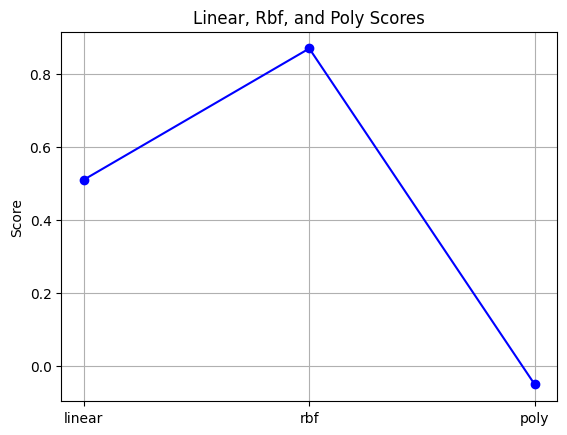

In [37]:
labels = ['linear', 'rbf', 'poly']
values = [linear_accuracy_train, rbf_accuracy_train, poly_accuracy_train]
plt.plot(labels, values, marker='o', linestyle='-', color='b')
plt.ylabel('Score')
plt.title('Linear, Rbf, and Poly Scores')
plt.grid(True)
plt.show()

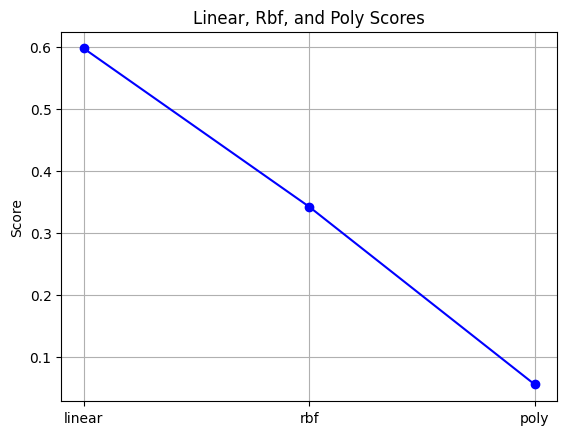

In [38]:
labels = ['linear', 'rbf', 'poly']
values = [linear_accuracy_test, rbf_accuracy_test, poly_accuracy_test]
plt.plot(labels, values, marker='o', linestyle='-', color='b')
plt.ylabel('Score')
plt.title('Linear, Rbf, and Poly Scores')
plt.grid(True)
plt.show()